## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [11]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 5 values will result in 4 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX')
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD')
boston_features = boston_features.drop(['RAD','TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX',axis=1)
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 3]","RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(0, 250]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,1,0,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,1,0,0,0,1,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,1,0,0,0,1,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,1,0,0,0,1,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,1,0,0,0,1,0,0,0,0


## Look at the histograms for the continuous variables

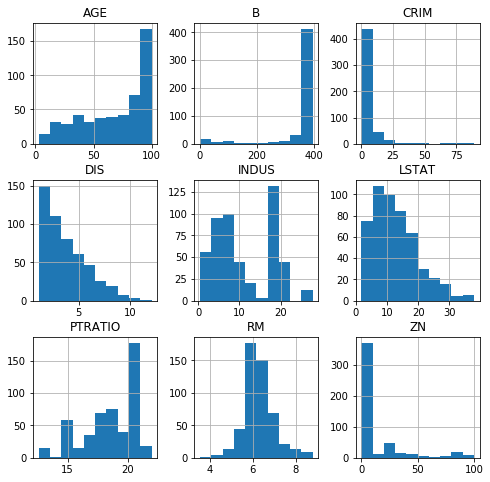

In [14]:
boston_cv = boston_features.drop(boston_features.filter(regex='TAX').columns, axis=1)
boston_cv = boston_cv.drop(boston_cv.filter(regex='RAD').columns, axis=1)
boston_cv = boston_cv.drop(['CHAS'], axis=1)
boston_cv.head()
boston_cv.hist(figsize  = [8, 8]);

In [20]:
import numpy as np
numeric_features = boston_cv.select_dtypes(include=[np.number])
for col in numeric_features:    
    print (col, "Skew is:", boston_cv[col].skew(), "Kurtosis is:", boston_cv[col].kurtosis())
#check for skewness & kurtosis

CRIM Skew is: 5.223148798243851 Kurtosis is: 37.13050912952203
ZN Skew is: 2.2256663227354307 Kurtosis is: 4.031510083739155
INDUS Skew is: 0.29502156787351164 Kurtosis is: -1.2335396011495188
RM Skew is: 0.40361213328874385 Kurtosis is: 1.8915003664993404
AGE Skew is: -0.5989626398812962 Kurtosis is: -0.9677155941626912
DIS Skew is: 1.0117805793009007 Kurtosis is: 0.4879411222443908
PTRATIO Skew is: -0.8023249268537809 Kurtosis is: -0.28509138330538875
B Skew is: -2.8903737121414492 Kurtosis is: 7.226817549260753
LSTAT Skew is: 0.9064600935915367 Kurtosis is: 0.49323951739272776


Skewness is a measure of symmetry in a distribution.  A standard normal distribution is perfectly symmetrical and has zero skew.  
**CRIM, ZN**, INDUS,RM, **DIS**, LSTAT have positive result /positively skewed. 
**AGE, PTRATIO, B** -have negative results/negatively skewed. 

Kurtosis tells us the height and sharpness of the central peak, relative to that of a standard bell curve.
**ZN, B, CRIM** - A positive value tells you that you have heavy-tails (i.e. a lot of data in your tails).  
**INDUS**, AGE, PTRATIO - A negative value means that you have light-tails (i.e. little data in your tails).  

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

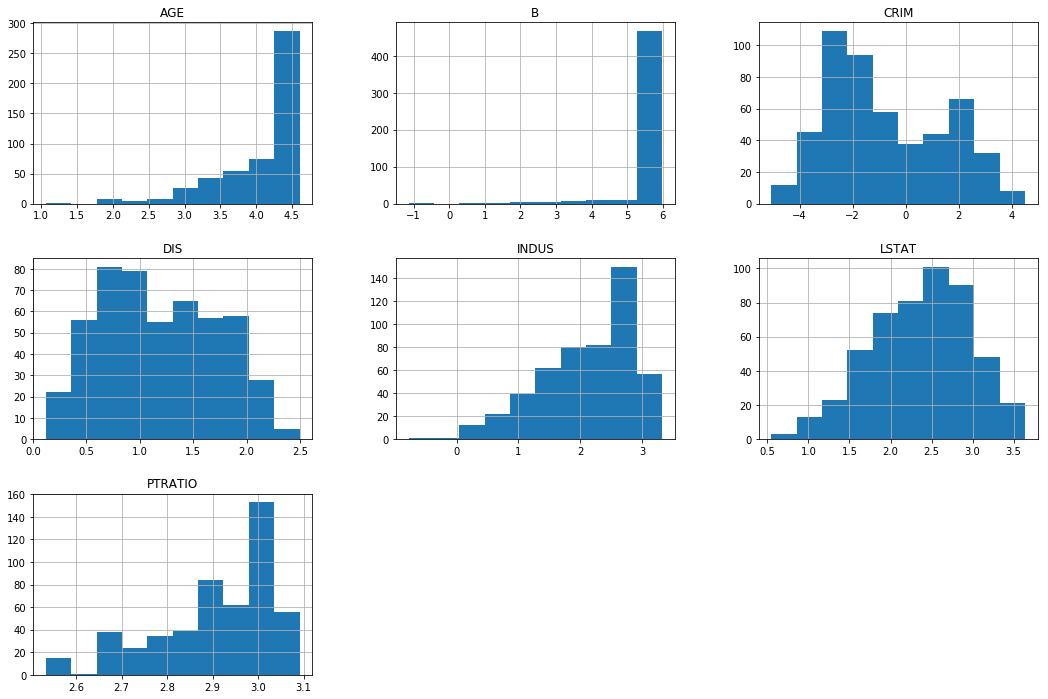

In [22]:
import numpy as np
data_log= pd.DataFrame([])
data_log["AGE"] = np.log(boston_cv["AGE"])
data_log["B"] = np.log(boston_cv["B"])
data_log["CRIM"] = np.log(boston_cv["CRIM"])
data_log["DIS"] = np.log(boston_cv["DIS"])
data_log["INDUS"] = np.log(boston_cv["INDUS"])
data_log["LSTAT"] = np.log(boston_cv["LSTAT"])
data_log["PTRATIO"] = np.log(boston_cv["PTRATIO"])
data_log.hist(figsize=(18,12));

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [23]:
data_log['ZN'] = np.log(boston_cv['ZN'])
boston_cv['ZN'].describe()


/Users/rndatasc/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

,CRIM,B,RM,DIS,INDUS,LSTAT,AGE,PTRATIO
0,0.000000,1.000000,0.577505,0.409104,-1.704344,-0.247852,-0.034757,0.041664
1,0.153211,1.000000,0.547998,0.769562,-0.263239,-0.051253,0.106335,0.043976
2,0.153134,0.989737,0.694386,0.769562,-0.263239,-0.316381,-0.076981,0.043976
3,0.171005,0.994276,0.658555,1.139194,-1.778965,-0.418482,-0.234551,0.044729
4,0.250315,1.000000,0.687105,1.139194,-1.778965,-0.225862,-0.148042,0.044729


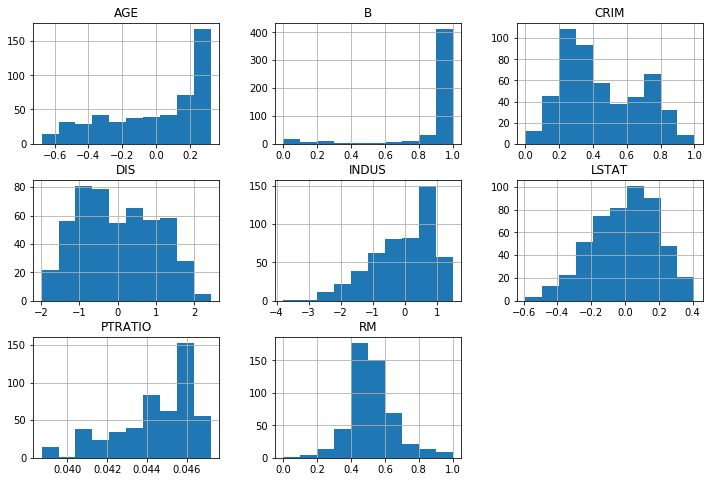

In [24]:
age = boston_cv['AGE']
b = boston_cv['B']
rm = boston_cv['RM']
logcrim = data_log['CRIM'] 
logdis = data_log['DIS']  
logindus = data_log['INDUS'] 
loglstat = data_log['LSTAT']
logptratio = data_log['PTRATIO']

features_final= pd.DataFrame([])

features_final['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final['B'] = (b-min(b))/(max(b)-min(b))
features_final['RM'] = (rm-min(rm))/(max(rm)-min(rm))
features_final['DIS']   = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final['LSTAT'] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
features_final['AGE'] = (age-np.mean(age))/(max(age)-min(age))
features_final['PTRATIO'] = (logptratio)/(np.linalg.norm(logptratio))
features_final.hist(figsize  = [12, 8]);
features_final.head()

Store your final features in a dataframe `features_final`

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.